In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
treated = pd.read_csv("/content/Treated_numeric_columns_phl(20%).csv")

In [ ]:
var = treated.head(15)
print(var.to_string())

    Unnamed: 0  P_STATUS  P_YEAR      P_PERIOD  P_PERIOD_ERROR_MIN  P_PERIOD_ERROR_MAX        S_RA      S_DEC     S_MAG  S_DISTANCE  S_DISTANCE_ERROR_MIN  S_DISTANCE_ERROR_MAX  S_MASS  S_RADIUS  S_RADIUS_ERROR_MIN  S_RADIUS_ERROR_MAX  S_TEMPERATURE  S_TEMPERATURE_ERROR_MIN  S_TEMPERATURE_ERROR_MAX  S_LOG_G  P_DISTANCE  P_PERIASTRON  P_APASTRON  P_DISTANCE_EFF        P_FLUX    P_FLUX_MIN    P_FLUX_MAX  P_TEMP_EQUIL  P_TEMP_EQUIL_MIN  P_TEMP_EQUIL_MAX  S_RADIUS_EST     S_RA_H  S_LUMINOSITY  S_HZ_OPT_MIN  S_HZ_OPT_MAX  S_HZ_CON_MIN  S_HZ_CON_MAX  S_HZ_CON0_MIN  S_HZ_CON0_MAX  S_HZ_CON1_MIN  S_HZ_CON1_MAX  S_SNOW_LINE  S_TIDAL_LOCK  P_HABZONE_OPT  P_HABZONE_CON  P_HABITABLE     P_ESI  P_RADIUS_EST  P_MASS_EST  P_SEMI_MAJOR_AXIS_EST
0            0       3.0  2007.0  3.260300e+02           -0.320000             0.32000  185.179280  17.792868   4.74000       93.37               -1.9200                1.9200    2.70   19.0000             -2.0000              2.0000        4742.00              

In [ ]:
var = treated.dtypes
print(var.to_string())

Unnamed: 0                   int64
P_STATUS                   float64
P_YEAR                     float64
P_PERIOD                   float64
P_PERIOD_ERROR_MIN         float64
P_PERIOD_ERROR_MAX         float64
S_RA                       float64
S_DEC                      float64
S_MAG                      float64
S_DISTANCE                 float64
S_DISTANCE_ERROR_MIN       float64
S_DISTANCE_ERROR_MAX       float64
S_MASS                     float64
S_RADIUS                   float64
S_RADIUS_ERROR_MIN         float64
S_RADIUS_ERROR_MAX         float64
S_TEMPERATURE              float64
S_TEMPERATURE_ERROR_MIN    float64
S_TEMPERATURE_ERROR_MAX    float64
S_LOG_G                    float64
P_DISTANCE                 float64
P_PERIASTRON               float64
P_APASTRON                 float64
P_DISTANCE_EFF             float64
P_FLUX                     float64
P_FLUX_MIN                 float64
P_FLUX_MAX                 float64
P_TEMP_EQUIL               float64
P_TEMP_EQUIL_MIN    

In [ ]:
treated.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
treated['P_STATUS'].corr(treated['P_HABITABLE'])

nan

In [ ]:
treated['P_YEAR'].corr(treated['P_HABITABLE'])

0.03715823356023926

In [ ]:
import missingno as msno

<Axes: >

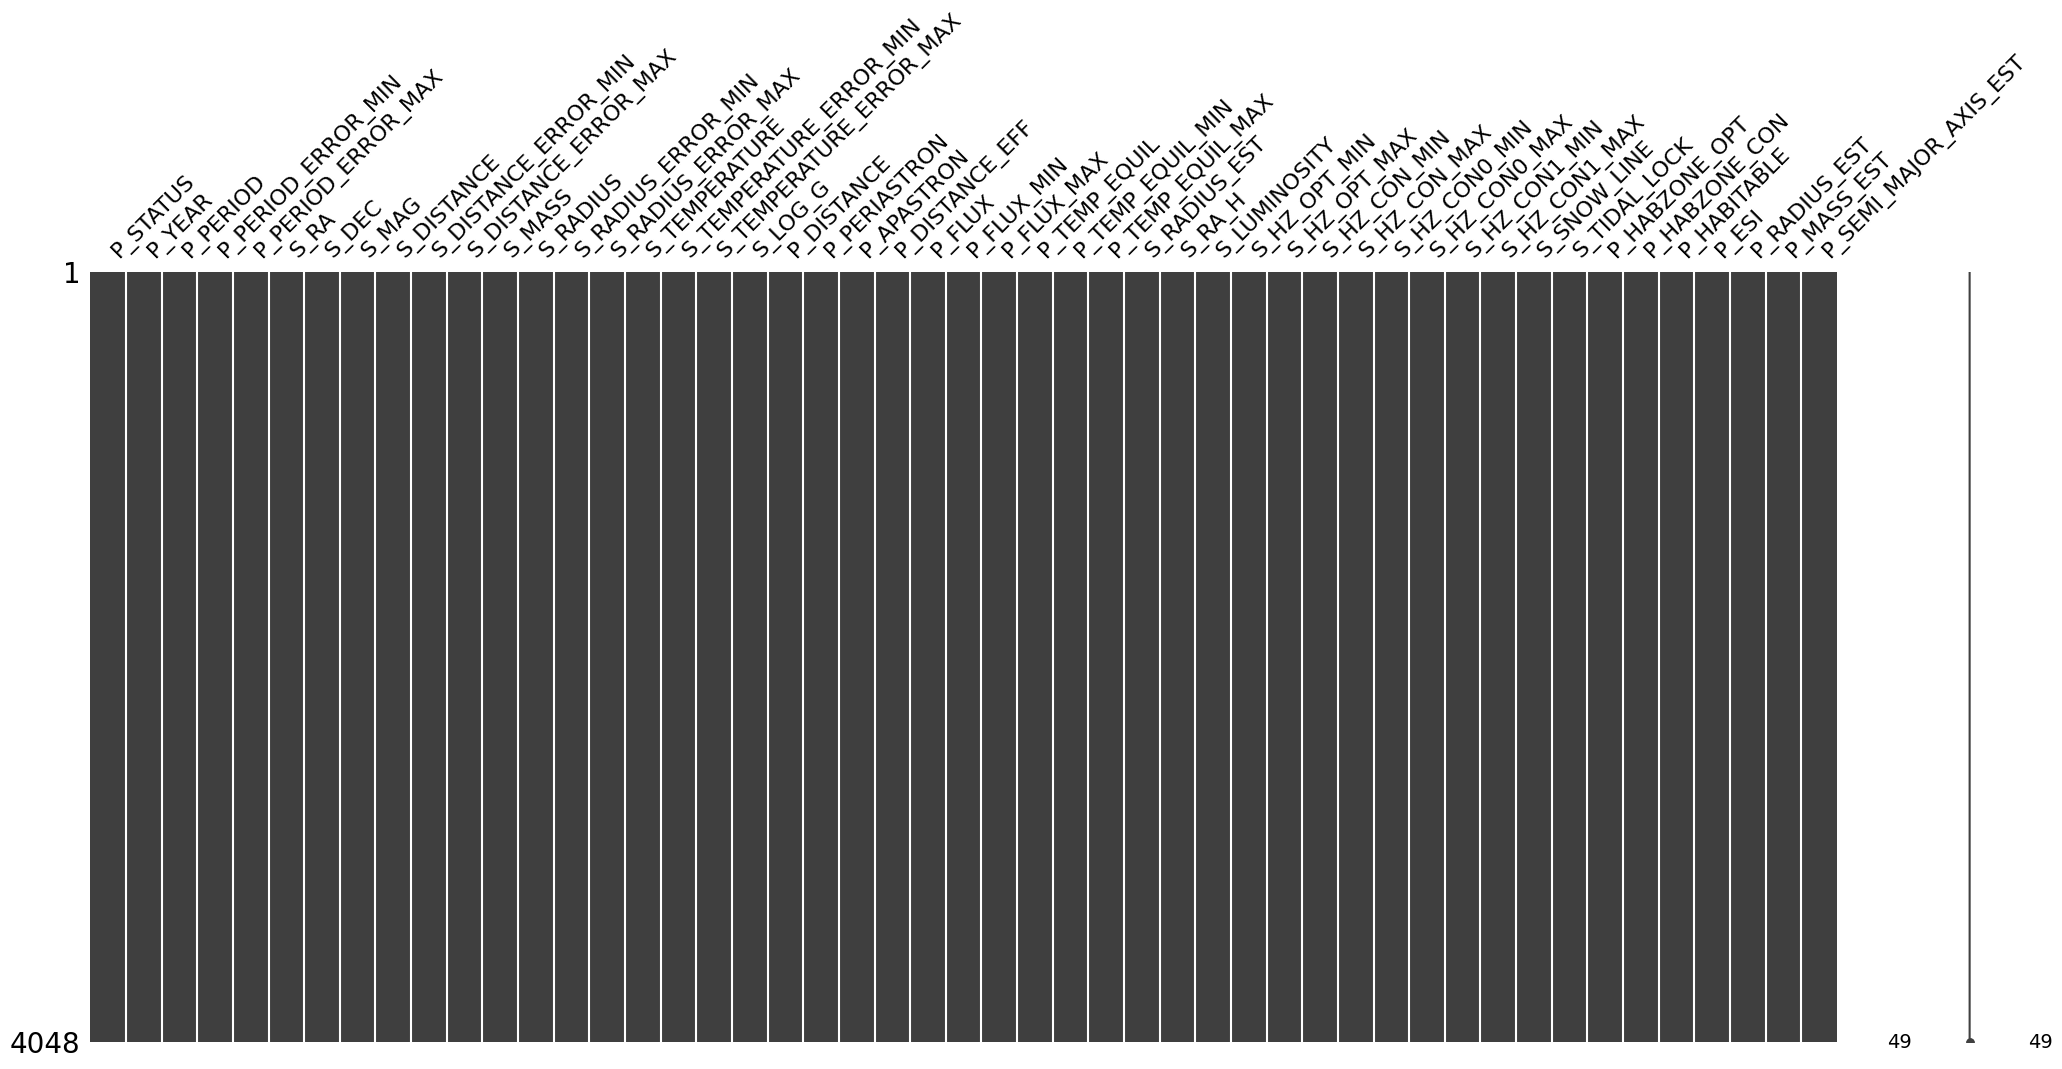

In [ ]:
msno.matrix(treated)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
corr_matrix = treated.corr()

In [ ]:
corr_matrix

,P_STATUS,P_YEAR,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,S_RA,S_DEC,S_MAG,S_DISTANCE,S_DISTANCE_ERROR_MIN,...,S_HZ_CON1_MAX,S_SNOW_LINE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
P_STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P_YEAR,NaN,1.000000,-0.084738,0.064755,-0.058693,0.127611,0.162322,0.431878,0.130385,-0.089456,...,-0.109485,-0.112850,-0.124668,-0.131331,-0.137954,0.037158,0.200589,-0.403430,-0.248147,-0.062299
P_PERIOD,NaN,-0.084738,1.000000,-0.929857,0.890461,-0.037482,-0.084408,-0.021412,-0.039254,0.012278,...,-0.012592,-0.013663,-0.242017,-0.015807,-0.012934,-0.008022,-0.095893,0.097208,0.297053,0.602553
P_PERIOD_ERROR_MIN,NaN,0.064755,-0.929857,1.000000,-0.989056,0.026854,0.065811,0.002946,0.025931,-0.005749,...,0.016582,0.018095,0.203165,0.013663,0.011208,0.006751,0.080338,-0.076747,-0.235692,-0.417980
P_PERIOD_ERROR_MAX,NaN,-0.058693,0.890461,-0.989056,1.000000,-0.022965,-0.055501,0.003362,-0.020752,0.003370,...,-0.017081,-0.018691,-0.179653,-0.011800,-0.009575,-0.005971,-0.070145,0.066219,0.206731,0.336343
S_RA,NaN,0.127611,-0.037482,0.026854,-0.022965,1.000000,0.457448,0.451398,0.254805,-0.119383,...,-0.118100,-0.117960,-0.026532,-0.079648,-0.077260,-0.015005,0.166683,-0.354372,-0.178733,-0.052758
S_DEC,NaN,0.162322,-0.084408,0.065811,-0.055501,0.457448,1.000000,0.431604,0.076873,0.068128,...,-0.010487,-0.012644,0.088503,-0.112924,-0.105354,-0.020632,0.235502,-0.445977,-0.212480,-0.075776
S_MAG,NaN,0.431878,-0.021412,0.002946,0.003362,0.451398,0.431604,1.000000,0.470545,-0.235588,...,-0.354182,-0.364509,-0.312606,-0.149685,-0.150634,0.042852,0.228067,-0.504415,-0.320850,-0.043411
S_DISTANCE,NaN,0.130385,-0.039254,0.025931,-0.020752,0.254805,0.076873,0.470545,1.000000,-0.758860,...,0.002478,0.008761,-0.098704,-0.108520,-0.096048,-0.051428,-0.128064,-0.061800,-0.041680,-0.036544
S_DISTANCE_ERROR_MIN,NaN,-0.089456,0.012278,-0.005749,0.003370,-0.119383,0.068128,-0.235588,-0.758860,1.000000,...,-0.013345,-0.017878,0.130230,0.057586,0.049627,0.025363,0.116193,-0.022593,0.002657,0.012069


In [ ]:
treated.drop(['P_STATUS', 'P_YEAR'], axis=1, inplace=True)

In [ ]:
X = treated.drop(['P_HABITABLE', 'P_HABZONE_OPT'], axis=1)
y = treated['P_HABITABLE']

<Axes: title={'center': 'Class Count'}>

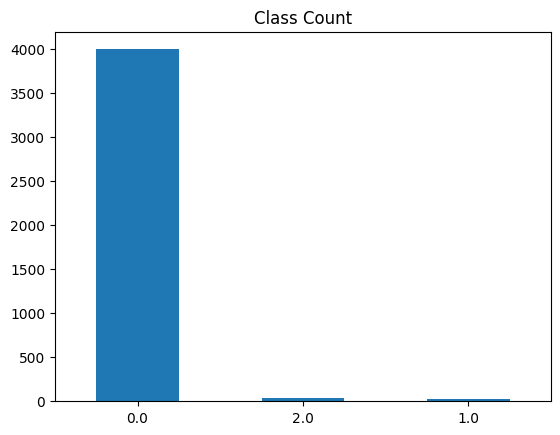

In [ ]:
target_count = treated['P_HABITABLE'].value_counts()
target_count.plot(kind='bar', title='Class Count', rot=0)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train.shape
#X_test.shape, y_train.shape, y_test.shape

(3238, 45)

In [ ]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<Axes: >

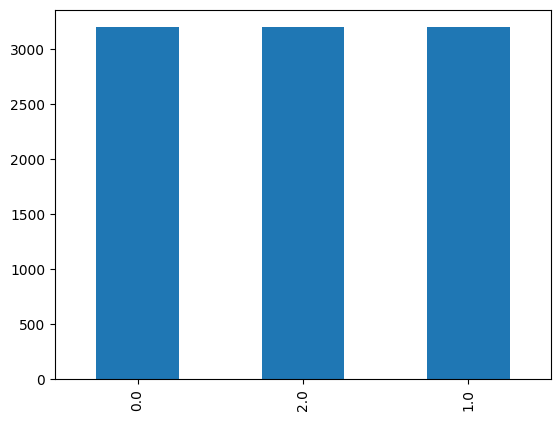

In [ ]:
pd.Series(y_train_resampled).value_counts().plot.bar()

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))

X_train_selected = sel.fit_transform(X_train_resampled, y_train_resampled)

In [ ]:
X_test_selected = sel.transform(X_test)

In [ ]:
mask = sel.get_support(indices=True)
X_test.columns[mask]

Index(['S_DISTANCE', 'S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'P_FLUX_MIN',
       'P_FLUX_MAX', 'P_TEMP_EQUIL', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX',
       'S_TIDAL_LOCK', 'P_ESI', 'P_RADIUS_EST', 'P_MASS_EST'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Performance metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
#random_state=0

In [ ]:
random_forest.fit(X_train_selected, y_train_resampled)

RandomForestClassifier()

In [ ]:
y_pred = random_forest.predict(X_test_selected)

In [ ]:
accuracy = accuracy_score( y_test, y_pred)
print("Acurácia: ", accuracy)

Acurácia:  0.9987654320987654


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
conf_rf = confusion_matrix(y_test, y_pred)

def conf_matrix(x):
    plt.figure(dpi=125)
    class_labels = ['Classe 0', 'Classe 1', 'Classe 2']
    sns.heatmap(x, annot=True, fmt='d', cmap=plt.cm.Blues, square=True, xticklabels=class_labels, yticklabels=class_labels)

    plt.xlabel('Predicted planets')
    plt.ylabel('Actual planets')

Text(0.5, 1.0, 'Confusion Matrix of Random Forest')

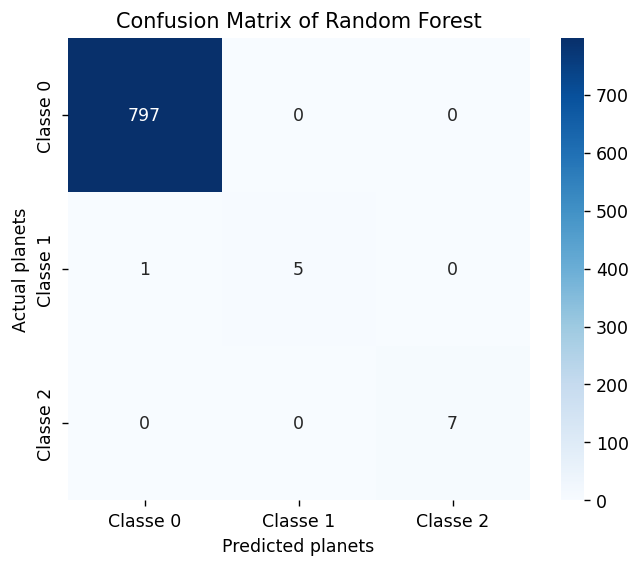

In [ ]:
conf_matrix(conf_rf)
plt.title('Confusion Matrix of Random Forest')

In [ ]:
f1 = f1_score(y_test, y_pred, average='macro')

In [ ]:
print("F1-score Random Forest:", f1)

F1-score Random Forest: 0.9694879832810868


In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision = precision_score(y_test, y_pred, average="macro")

In [ ]:
recall = recall_score(y_test, y_pred, average="macro")

In [ ]:
print("Precision RF:", precision)

Precision RF: 0.9995822890559732


In [ ]:
print("Recall RF:", recall)

Recall RF: 0.9444444444444445


In [ ]:
import pickle

In [ ]:
pickle.dump(random_forest, open('saved_exoplanets_rf_model_4.pkl', 'wb'))


In [ ]:
var = y_test
print(var.to_string())

1327    0.0
1580    0.0
1284    0.0
3463    0.0
1694    0.0
1446    0.0
3059    0.0
1410    0.0
2486    0.0
4010    0.0
581     0.0
3367    0.0
2674    0.0
3385    0.0
3774    0.0
683     0.0
3049    0.0
3542    0.0
1918    0.0
1815    0.0
879     0.0
678     0.0
615     0.0
2365    2.0
2864    0.0
3772    0.0
3896    0.0
2094    0.0
304     0.0
1912    0.0
142     0.0
899     0.0
682     0.0
3841    0.0
3543    0.0
1266    0.0
1239    0.0
685     0.0
3035    0.0
953     0.0
2445    0.0
87      0.0
2942    0.0
1759    0.0
1969    0.0
3322    0.0
31      0.0
3504    0.0
514     0.0
2420    0.0
868     0.0
4031    0.0
1069    0.0
2765    0.0
408     0.0
3872    0.0
1739    0.0
1515    0.0
841     0.0
2602    0.0
3225    0.0
381     0.0
410     0.0
3359    0.0
1914    0.0
3681    0.0
1414    0.0
528     0.0
1530    0.0
1341    0.0
3409    0.0
1696    0.0
4033    0.0
1780    0.0
3217    0.0
326     0.0
491     0.0
1490    0.0
214     0.0
1457    0.0
1225    0.0
1872    0.0
706     0.0
3088

In [ ]:
treated.loc[1473]

P_PERIOD                    198.680180
P_PERIOD_ERROR_MIN           -0.002176
P_PERIOD_ERROR_MAX            0.002176
S_RA                        295.662870
S_DEC                        44.525845
S_MAG                        15.001000
S_DISTANCE                  702.000000
S_DISTANCE_ERROR_MIN        -47.620000
S_DISTANCE_ERROR_MAX         62.340000
S_MASS                        0.860000
S_RADIUS                      0.820000
S_RADIUS_ERROR_MIN           -0.050000
S_RADIUS_ERROR_MAX            0.070000
S_TEMPERATURE              5321.000000
S_TEMPERATURE_ERROR_MIN    -145.360000
S_TEMPERATURE_ERROR_MAX     147.760000
S_LOG_G                       4.550000
P_DISTANCE                    0.633547
P_PERIASTRON                  0.633547
P_APASTRON                    0.633547
P_DISTANCE_EFF                0.633547
P_FLUX                        1.203183
P_FLUX_MIN                    1.203183
P_FLUX_MAX                    1.203183
P_TEMP_EQUIL                266.825830
P_TEMP_EQUIL_MIN         

In [ ]:
treated.loc[3819]

P_PERIOD                     11.409000
P_PERIOD_ERROR_MIN           -0.009000
P_PERIOD_ERROR_MAX            0.009000
S_RA                         43.253708
S_DEC                        16.881289
S_MAG                        15.080000
S_DISTANCE                    3.830000
S_DISTANCE_ERROR_MIN          0.000000
S_DISTANCE_ERROR_MAX          0.000000
S_MASS                        0.090000
S_RADIUS                      0.110000
S_RADIUS_ERROR_MIN            0.000000
S_RADIUS_ERROR_MAX            0.000000
S_TEMPERATURE              2904.000000
S_TEMPERATURE_ERROR_MIN     -51.000000
S_TEMPERATURE_ERROR_MAX      51.000000
S_LOG_G                       2.104750
P_DISTANCE                    0.044300
P_PERIASTRON                  0.044300
P_APASTRON                    0.044300
P_DISTANCE_EFF                0.044300
P_FLUX                        0.392874
P_FLUX_MIN                    0.392874
P_FLUX_MAX                    0.392874
P_TEMP_EQUIL                201.701050
P_TEMP_EQUIL_MIN         

In [ ]:
X_test['P_RADIUS_EST']

1327     1.905700
1580     2.410150
1284    15.682790
3463     2.365310
1694     1.524560
          ...    
71      11.434200
3449     2.824920
4029    12.937940
2194     2.298050
169     12.952003
Name: P_RADIUS_EST, Length: 810, dtype: float64

In [ ]:
treated['P_HABZONE_CON'].loc[treated['P_HABITABLE'] == 2]

137     0.0
151     1.0
159     1.0
189     0.0
740     1.0
1029    0.0
1182    1.0
1193    0.0
1275    0.0
1473    0.0
1894    0.0
2063    1.0
2070    1.0
2080    1.0
2146    0.0
2178    0.0
2184    0.0
2204    1.0
2205    1.0
2238    1.0
2365    1.0
2490    0.0
2552    1.0
2590    0.0
2591    1.0
2596    0.0
2931    0.0
2934    1.0
2953    1.0
3166    0.0
3183    0.0
3285    1.0
3663    1.0
4043    0.0
Name: P_HABZONE_CON, dtype: float64